<h1> <center> Dashboard </center> </h1>

In [2]:
import einops
import torch
import numpy as np
from PIL import Image
import json
from json2html import *
import tempfile
import webbrowser
import os
from glob import glob

#### 1. Load the model

In [3]:
#from models.TransUNet.model import MyTransUNet#, build_the_model
from models.TwoTilesSegmenter.TwoTilesSegmenter import build_the_model, Segmenter, build_the_dataloader

/home/student/.local/lib/python3.8/site-packages/pl_bolts/utils/warnings.py:30: UserWarning: You want to use `wandb` which is not installed yet, install it with `pip install wandb`.
  stdout_func(
/home/student/.local/lib/python3.8/site-packages/pl_bolts/utils/warnings.py:30: UserWarning: You want to use `gym` which is not installed yet, install it with `pip install gym`.
  stdout_func(


In [4]:
model = build_the_model(
    device="cuda",
    model_path="models/TwoTilesSegmenter/Parameters/seg-1-epoch=10-val_iou=0.3343.meow"
)

model_name = "seg-1"

Trainable parameters amount: 42217922


#### 2. Load the company test dataset via custom dataloader

In [5]:
main_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/company_target_images",
    mask_path="/home/student/Documents/Xrays/Data/company_target_masks/",
    name="main_targets"
)

In [6]:
jenya_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/jenya_target_images",
    mask_path="/home/student/Documents/Xrays/Data/jenya_target_masks",
    name="jenya_targets"
)

# TODO: добавить тестовую выборку (dataloader)

#### 3. Build the Dashboard

In [7]:
from dashboard import Board

In [8]:
def render_fn(x):
#     print("XXX ", x.shape)
    if len(x.shape) == 3:
        x = einops.rearrange(x, "c h w -> (c h) w", c=1)
        x = (x - x.min()) / (x.max() - x.min())
        x *= 255
        x = x.to(torch.uint8)
        x = np.array(x.cpu())
    else:
        x = einops.rearrange(x, "b c h w -> (b c h) w", b=1, c=1)
        x =  (x > 0.5).float()
        x *= 255
        x = x.to(torch.uint8)
        x = np.array(x.cpu())
    
    return x

In [9]:
board = Board(
    dataloaders=[            # dataloader returns tuple of any types objects
        main_dataloader,
        jenya_dataloader,
    ],
    model=model,            # model returns object that go right in the measure() and
                            # go in the render() wrapped with render_fn
    model_name=model_name,  # name of the model
    render_fn=render_fn,
    render_dl_idx=0,        # index of dataloader we need to render
    obj_item=1,             # index of element in tuple from dataloader that will be rendered
    obj_name_item=2,        # index of filename
    to_model_item=0,        # image
    limit=10,               # amount of rendered objects
    phs_in_row=1,           # amount of rendered objects in row
    get_randomly=False,     # it's usefull if dataloader is big and 
                            # we want to get different :limit: object from it to render  
    c=3
)

#### 4. Run the Dashboard

Try to form a storage with 57 objects from dataloader. Device: cuda:0
Try to form a storage with 35 objects from dataloader. Device: cuda:0
Storages has been formed
Render...


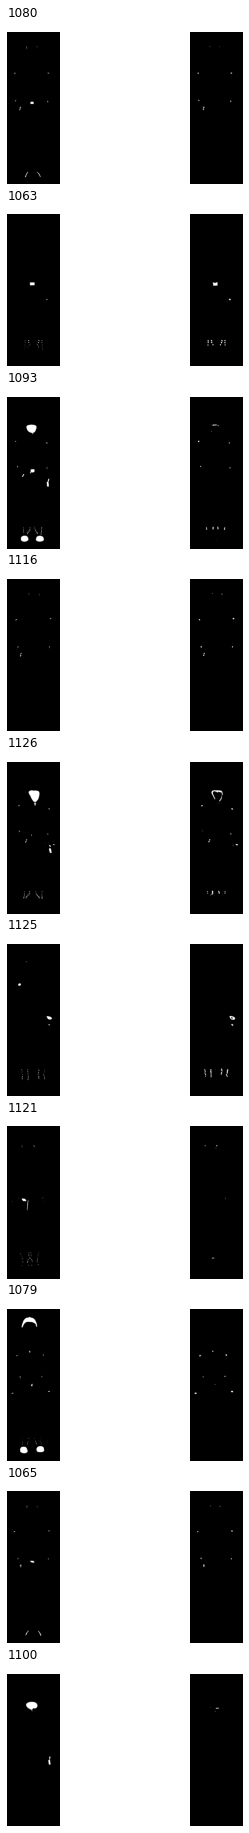

Measure...
Load MSELoss interface from metrics/MSELoss.py
Load IoU interface from metrics/IoU.py
Load MS_SSIM interface from metrics/MS_SSIM.py
metric: MSELoss, val: 4.484974384307861, idx: 14, name: 1123
metric: IoU, val: 0.16849756240844727, idx: 9, name: 1100
metric: MS_SSIM, val: 0.9999978542327881, idx: 26, name: 1115
Load MSELoss interface from metrics/MSELoss.py
Load IoU interface from metrics/IoU.py
Load MS_SSIM interface from metrics/MS_SSIM.py
metric: MSELoss, val: 7.847084999084473, idx: 5, name: Ð´Ð°Ð¼Ð°2
metric: IoU, val: 0.14428305625915527, idx: 34, name: 417
metric: MS_SSIM, val: 0.9933301210403442, idx: 32, name: Ð¸Ð½Ð² Ð¿Ð°Ñ


In [10]:
report = board.run()

In [11]:
html = json2html.convert(json=report, table_attributes='border="1px"; border-color: rgba(0,0,255,0.25)')
html = f'<link rel="stylesheet" href="{os.getcwd()}/table.css">' + \
 '<h1><center>Dashboard 📊</center></h1>' + \
 '<div class="table-wrapper"><table class="fl-table">' + \
 html + \
 '</table></div>'

with tempfile.NamedTemporaryFile(mode="w", suffix=".html", delete=False) as tf:
    tf.write(html)
    webbrowser.open('file://' + os.path.realpath(tf.name))

In [ ]:
response

In [ ]:
with tempfile.NamedTemporaryFile(mode="w", suffix=".html", delete=False) as tf:
    tf.write(html)
    webbrowser.open('file://' + os.path.realpath(tf.name))

In [ ]:
import os

In [ ]:
os.path.isfile("/usr/bin/google-chrome")